In [4]:
pip install tensorflow keras numpy matplotlib


Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.7 kB ? eta -:--:--
     ------------------- ------------------ 30.7/59.7 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 59.7/59.7 kB 450.0 kB/s eta 0:00:00
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     -------------------- ------------------- 30.7/61.0 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 806.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.8 MB 3.2 MB/s eta 0:00:05
   ---------------------------------------- 0.2/15.8 MB 2.0 MB/s eta 0:00:08
   ---------------------------------------- 0.2/15.8 MB 1.5 MB/s eta 0:00:11
    --------------------------------------- 0.2/15.8 MB 1.3 MB/s eta 0:00:13
    ---------------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyfume 0.3.4 requires numpy==1.24.4, but you have numpy 1.26.4 which is incompatible.


In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [8]:
# Load the pre-trained ResNet50 model (without top layers)
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224,224,3))

# Freeze all layers to retain pre-trained features
for layer in base_model.layers:
    layer.trainable = False


In [10]:
# Add custom layers on top of ResNet50
x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)  # Prevent overfitting
x = Dense(1, activation="sigmoid")(x)  # Binary classification (COVID-19 vs. Normal)

# Create final model
model = Model(inputs=base_model.input, outputs=x)  # Ensure 'x' is connected properly

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])


In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=20, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True,
    validation_split=0.2  # 80-20 train-validation split
)

# Load training images
train_generator = train_datagen.flow_from_directory(
    r"C:\Users\vigne\data_new\Dataset\Train",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="training"
)

# Load validation images
val_generator = train_datagen.flow_from_directory(
    r"C:\Users\vigne\data_new\Dataset\Val",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)


Found 232 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [16]:
history = model.fit(
    train_generator,
    epochs=10,  # Change this based on dataset size
    validation_data=val_generator
)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8371 - loss: 0.4915 - val_accuracy: 0.6667 - val_loss: 0.6410
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7662 - loss: 0.5113 - val_accuracy: 0.8333 - val_loss: 0.4099
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8253 - loss: 0.4906 - val_accuracy: 0.8333 - val_loss: 0.4074
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8008 - loss: 0.4670 - val_accuracy: 0.9167 - val_loss: 0.4121
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8278 - loss: 0.4441 - val_accuracy: 0.8333 - val_loss: 0.4447
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8277 - loss: 0.4721 - val_accuracy: 0.8333 - val_loss: 0.3740
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8477 - loss: 0.4105 - val_accuracy: 1.0000 - val_loss: 0.2907
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8443 - loss: 0.4440 - val_accuracy: 0.8333 - val_loss: 0.3121
Epoch 9/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


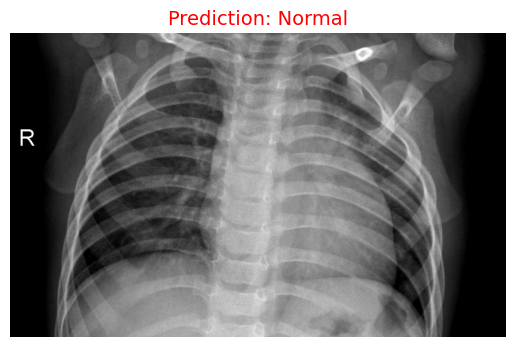

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load and preprocess an image
img_path = r"C:\Users\vigne\data_new\Dataset\Prediction\NORMAL2-IM-0338-0001.jpeg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
prediction = model.predict(img_array)
predicted_label = "COVID-19" if prediction[0][0] <= 0.5 else "Normal"  # Reverse the logic

# Display the image with prediction
plt.imshow(image.load_img(img_path))  # Show original image
plt.axis("off")
plt.title(f"Prediction: {predicted_label}", fontsize=14, color="red")
plt.show()
